In [743]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

# Exercice PARTIE 1 - Analysez des données de systèmes éducatifs

## Etape 1 : Chargez les données dans votre notebook

In [744]:
country_series = pd.read_csv('data/EdStatsCountry-Series.csv')
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [745]:
country = pd.read_csv('data/EdStatsCountry.csv')
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [746]:
data = pd.read_csv('data/EdStatsData.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [747]:
foot_note = pd.read_csv('data/EdStatsFootNote.csv')
foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [748]:
series = pd.read_csv('data/EdStatsSeries.csv')
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Etape 2 : Collectez des informations basiques sur chaques jeu de données

Je vais analyser chaque jeu de données chargé précédemment. Pour chaque fichier, je vais :

- Définir ce que représente une ligne.
- Calculer le nombre de lignes et de colonnes.
- Compter et supprimer les doublons si présents.
- Calculer la proportion de valeurs manquantes par colonne.
- Supprimer les colonnes inutilisables (expliqué dans le code).
- Pour les colonnes numériques : afficher les statistiques de describe().
- Pour les colonnes catégorielles : afficher les 10 valeurs les plus fréquentes.

In [749]:
dfs = {
    "data": data,
    "series": series,
    "country": country,
    "foot_note": foot_note,
    "country_series": country_series,
}

def devine_signification_ligne(df):
    cols = set(c.lower() for c in df.columns)
    if {"country name", "country code"}.issubset(cols) and ("indicator code" in cols or "series code" in cols):
        return "une ligne = un pays + un indicateur (valeurs par année)"
    if ("series code" in cols or "indicator code" in cols) and ("indicator name" in cols or "series name" in cols):
        return "une ligne = un indicateur"
    if {"country name", "country code"}.issubset(cols):
        return "une ligne = un pays"
    return "une ligne = un enregistrement (non reconnu automatiquement)"

SEUIL_COLS_MANQUANTES = 0.95

resultats = {}

for name, df in dfs.items():
    print("\n" + "=" * 80)
    print(f"FICHIER: {name}")
    print("=" * 80)

    # a) Définir ce que représente une ligne
    signification = devine_signification_ligne(df)
    print(f"Ce que représente une ligne : {signification}")

    # b) Dimensions avant nettoyage
    print(f"Dimensions avant nettoyage : {df.shape[0]} lignes, {df.shape[1]} colonnes")

    # c) Doublons
    nb_doublons = df.duplicated().sum()
    print(f"Doublons trouvés : {nb_doublons}")

    # d) Suppression des doublons
    df = df.drop_duplicates()
    print(f"Après suppression des doublons : {df.shape[0]} lignes, {df.shape[1]} colonnes")

    # e) Valeurs manquantes
    pct_na = (df.isna().mean() * 100).round(2)
    print("\nProportion de valeurs manquantes (%) — top 10 :")
    print(pct_na.sort_values(ascending=False).head(10).to_string())

    # f) Suppression des colonnes inutilisables
    cols_a_supprimer = df.columns[df.isna().mean() > SEUIL_COLS_MANQUANTES]
    if len(cols_a_supprimer) > 0:
        df = df.drop(columns=cols_a_supprimer)
        print(f"\nColonnes supprimées (> {int(SEUIL_COLS_MANQUANTES * 100)}% de valeurs manquantes) : {list(cols_a_supprimer)}")
    else:
        print("\nAucune colonne supprimée")

    # g) Statistiques pour colonnes numériques
    cols_num = df.select_dtypes(include="number").columns
    if len(cols_num) > 0:
        print(f"\nStatistiques numériques :")
        print(df[cols_num].describe().T.to_string())
    else:
        print("\nPas de colonnes numériques détectées.")

    # h) Statistiques pour colonnes catégorielles
    cols_cat = df.select_dtypes(include="object").columns
    if len(cols_cat) > 0:
        print(f"\nColonnes catégorielles (top 5 valeurs) :")
        for col in cols_cat:
            print(f"\n- {col} (valeurs uniques : {df[col].nunique()})")
            print(df[col].value_counts(dropna=False).head(5).to_string())
    else:
        print("\nPas de colonnes catégorielles détectées.")

    # i) Dimensions finales
    print(f"\nDimensions après nettoyage : {df.shape[0]} lignes, {df.shape[1]} colonnes")

    dfs[name] = df
    resultats[name] = {
        "signification_ligne": signification,
        "shape_final": df.shape,
        "colonnes_supprimees": list(cols_a_supprimer),
        "nb_doublons_avant": int(nb_doublons),
        "pct_na": pct_na
    }

print("\nAnalyse terminée. Les DataFrames nettoyés sont dans dfs.")



FICHIER: data
Ce que représente une ligne : une ligne = un pays + un indicateur (valeurs par année)
Dimensions avant nettoyage : 886930 lignes, 70 colonnes
Doublons trouvés : 0
Doublons trouvés : 0
Après suppression des doublons : 886930 lignes, 70 colonnes
Après suppression des doublons : 886930 lignes, 70 colonnes

Proportion de valeurs manquantes (%) — top 10 :
Unnamed: 69    100.00
2017            99.98
2016            98.14
1971            95.99
1973            95.99
1972            95.98
1974            95.97
1979            95.85
1976            95.77
1989            95.77

Colonnes supprimées (> 95% de valeurs manquantes) : ['1971', '1972', '1973', '1974', '1976', '1977', '1978', '1979', '1981', '1982', '1983', '1984', '1986', '1987', '1988', '1989', '2016', '2017', 'Unnamed: 69']

Statistiques numériques :

Proportion de valeurs manquantes (%) — top 10 :
Unnamed: 69    100.00
2017            99.98
2016            98.14
1971            95.99
1973            95.99
1972         

## Etape 3 : Réalisez votre premier nettoyage

In [750]:
print("Country avant nettoyage :", len(dfs["country"]))
print("Country-Series avant nettoyage :", len(dfs["country_series"]))
print("FootNote avant nettoyage :", len(dfs["foot_note"]))
print("Data avant nettoyage :", len(dfs["data"]))



# 1) Fonctions utilitaires (détection des colonnes code/nom pays)
def col_code_pays(df):
    for c in ["Country Code", "CountryCode", "Country_Code", "Code"]:
        if c in df.columns: return c
    raise KeyError("Colonne code pays introuvable.")

def col_nom_pays(df):
    for c in ["Country Name", "TableName", "Short Name", "CountryName", "Name"]:
        if c in df.columns: return c
    return None

# 2) Repérage simple des faux pays dans dfs['country']
pays = dfs["country"].copy()
c_code = col_code_pays(pays)
c_nom  = col_nom_pays(pays)

noms_agregats = {
    "World","Euro area","European Union","OECD members","High income","Low income",
    "Upper middle income","Lower middle income","Arab World","East Asia & Pacific",
    "Europe & Central Asia","Latin America & Caribbean","Middle East & North Africa",
    "North America","South Asia","Sub-Saharan Africa"
}



m_region_agreg = ("Region" in pays.columns) and (pays["Region"].fillna("Aggregates")=="Aggregates")
m_income_nan   = ("Income Group" in pays.columns) and (pays["Income Group"].isna())
m_nom_agreg    = (c_nom is not None) and (pays[c_nom].isin(noms_agregats))

masque_faux    = m_region_agreg | m_income_nan | m_nom_agreg
pays_propre    = pays.loc[~masque_faux, [c_code]].drop_duplicates().rename(columns={c_code:"code_pays"})

# 3) Jointure interne (ne garde que les codes présents dans Country propre)
def join_pays_propre(df):
    code = col_code_pays(df)
    tmp  = df.rename(columns={code:"code_pays"})
    res  = tmp.merge(pays_propre, on="code_pays", how="inner").rename(columns={"code_pays":code})
    return res

dfs["country_propre"]        = dfs["country"].loc[~masque_faux].copy()
dfs["country_series_propre"] = join_pays_propre(dfs["country_series"])
dfs["foot_note_propre"]      = join_pays_propre(dfs["foot_note"])
dfs["data_propre"]           = join_pays_propre(dfs["data"])

# 4) Résumé
print("Country propre :", len(dfs["country_propre"]))
print("Country-Series propre :", len(dfs["country_series_propre"]))
print("FootNote propre :", len(dfs["foot_note_propre"]))
print("Data propre :", len(dfs["data_propre"]))


Country avant nettoyage : 241
Country-Series avant nettoyage : 613
FootNote avant nettoyage : 643638
Data avant nettoyage : 886930
Country propre : 214
Country-Series propre : 611
FootNote propre : 515752
Data propre : 784310
Country propre : 214
Country-Series propre : 611
FootNote propre : 515752
Data propre : 784310


# Exercice PARTIE 2 - Analysez des données de systèmes éducatifs

## Etape 1 : Réduisez le périmètre en utilisant une approche métier

In [751]:
dfs["series"].head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Base Period,Other notes,Source,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN


La colonne pertinente est "Topic" :

Elle indique à quel domaine appartient chaque indicateur (éducation, santé, économie, etc.).

In [752]:
# Liste des catégories à conserver (filtrage métier)
categories_a_garder = [
    "Education", 
    "Education: Participation",
    "Education: Efficiency", 
    "Education: Outcomes",
    "Education: Teachers",
    "Education: Expenditures",
    "Economic Policy & Debt",
    "Population",
    "Health: Population",
    "Social Protection & Labor"
]

# Identifier la colonne contenant la catégorie
col_topic = "Topic" if "Topic" in dfs["series"].columns else "Unnamed"

# Filtrer les indicateurs pertinents
indicateurs_filtrés = dfs["series"][dfs["series"][col_topic].isin(categories_a_garder)].copy()

print(f"Nombre d'indicateurs restants après filtrage : {len(indicateurs_filtrés)}")
display(indicateurs_filtrés.head(5))


Nombre d'indicateurs restants après filtrage : 213


,Series Code,Topic,Indicator Name,Short definition,Long definition,Base Period,Other notes,Source,Related source links
2405,SP.POP.0305.FE.UN,Population,"Population, ages 3-5, female","Population, ages 3-5, female is the total numb...","Population, ages 3-5, female is the total numb...",NaN,NaN,UNESCO Institute for Statistics (Derived),NaN
2406,SP.POP.0305.MA.UN,Population,"Population, ages 3-5, male","Population, ages 3-5, male is the total number...","Population, ages 3-5, male is the total number...",NaN,NaN,UNESCO Institute for Statistics (Derived),NaN
2407,SP.POP.0305.TO.UN,Population,"Population, ages 3-5, total","Population, ages 3-5, total is the total popul...","Population, ages 3-5, total is the total popul...",NaN,NaN,UNESCO Institute for Statistics (Derived),NaN
2408,SP.POP.0406.FE.UN,Population,"Population, ages 4-6, female","Population, ages 4-6, female is the total numb...","Population, ages 4-6, female is the total numb...",NaN,NaN,UNESCO Institute for Statistics (Derived),NaN
2409,SP.POP.0406.MA.UN,Population,"Population, ages 4-6, male","Population, ages 4-6, male is the total number...","Population, ages 4-6, male is the total number...",NaN,NaN,UNESCO Institute for Statistics (Derived),NaN


In [753]:
# Identifier la colonne code indicateur
col_code_indic = "Series Code" if "Series Code" in dfs["series"].columns else "Indicator Code"

# Extraire les codes retenus
codes_valides = indicateurs_filtrés[col_code_indic].unique()

# Filtrer les DataFrames concernés
dfs["series_propre"] = indicateurs_filtrés
dfs["data_propre"] = dfs["data"][dfs["data"]["Indicator Code"].isin(codes_valides)].copy()
dfs["country_series_propre"] = dfs["country_series"][dfs["country_series"]["SeriesCode"].isin(codes_valides)].copy()
dfs["foot_note_propre"] = dfs["foot_note"][dfs["foot_note"]["SeriesCode"].isin(codes_valides)].copy()

print("Filtrage appliqué aux différents fichiers.")
print(f"Data finale : {dfs['data_propre'].shape[0]} lignes, {dfs['data_propre'].shape[1]} colonnes")


Filtrage appliqué aux différents fichiers.
Data finale : 51546 lignes, 51 colonnes


Dans dfs["data"], chaque colonne après les métadonnées correspond à une année.
Certaines années sont futures (par exemple 2030) car il s’agit de projections ou estimations.
Elles ne représentent pas des données observées, donc on les supprime pour ne garder que les années historiques.

In [754]:
colonnes_annees = [col for col in dfs["data_propre"].columns if col.isdigit()]
print(f"Colonnes années détectées : {colonnes_annees}")

annees = [int(a) for a in colonnes_annees]

annees_valides = [a for a in annees if 1980 <= a <= 2025]

colonnes_a_garder = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"] + [str(a) for a in annees_valides]

dfs["data_propre"] = dfs["data_propre"][colonnes_a_garder].copy()

print(f"Années conservées : de {min(annees_valides)} à {max(annees_valides)}")
print(f"Data finale : {dfs['data_propre'].shape[0]} lignes, {dfs['data_propre'].shape[1]} colonnes")


Colonnes années détectées : ['1970', '1975', '1980', '1985', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']
Années conservées : de 1980 à 2025
Data finale : 51546 lignes, 34 colonnes


## Etape 2 : Réduisez le périmètre en utilisant une approche data

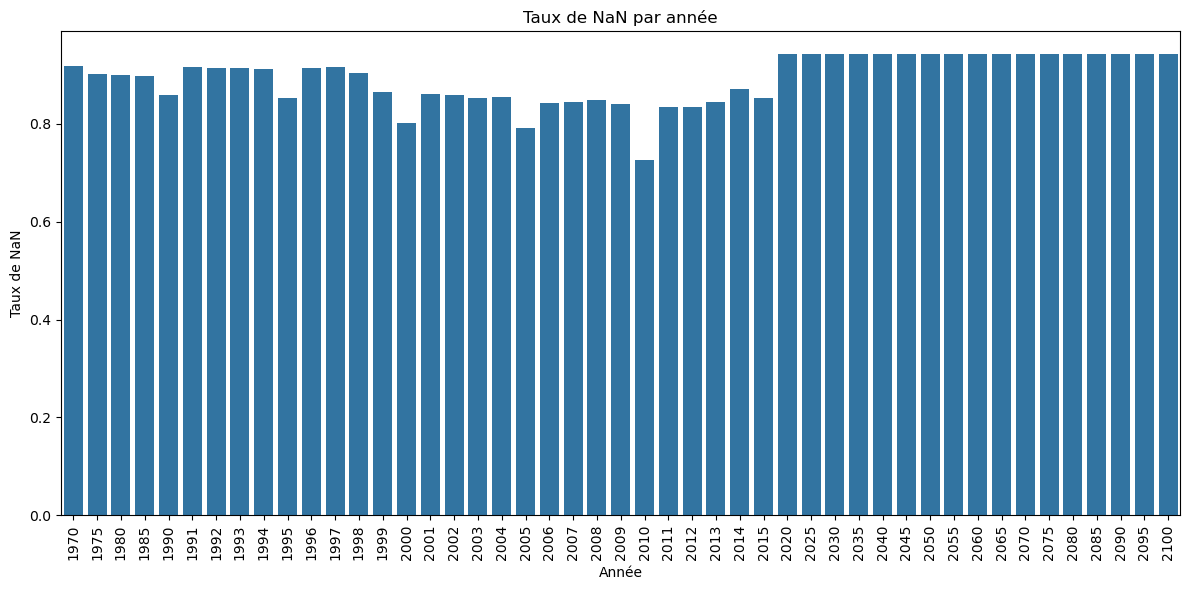

In [755]:
# Tous d'abord on va afficher le taux de NaN par année dans un graphique en batons
colonnes_annees_str = [c for c in dfs['data'].columns if c.isdigit()]
# proportion de NaN par année (sur toutes les lignes/pays-indicateurs)
data_years_nan = dfs['data'][colonnes_annees_str].isna().mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=data_years_nan, x='index', y=0, color='C0')
plt.xticks(rotation=90)
plt.title("Taux de NaN par année")
plt.xlabel("Année")
plt.ylabel("Taux de NaN")
plt.tight_layout()
plt.show()

# Choix d'années retenues
annees_a_garder = ['2010', '2011', '2012', '2013', '2014', '2015']

In [756]:
# Ici on va supprimer les sous indicateurs donc les indicateurs qui contiennent 4 points "." dans leur code
print("Avant :", len(dfs['series']))
dfs['series'] = dfs['series'][~dfs['series']['Series Code'].str.contains(r'\..*\..*\..*\.')]
print("Après :", len(dfs['series']))

Avant : 3665
Après : 1268


In [757]:
# On calcule d'abord la proportion de NaN par indicateur sur l'ensemble des pays et années
data_tempo = dfs['data'][['Indicator Code'] + annees_a_garder].copy()
# Agréger par indicateur : proportion moyenne de NaN sur toutes les lignes (pays) et années
taux_par_indic = (
    data_tempo
    .groupby('Indicator Code')[annees_a_garder]
    .apply(lambda df: df.isna().mean().mean())
)
# garder les indicateurs avec <=20% de NaN
indicateurs_a_garder = taux_par_indic[taux_par_indic <= 0.2].index
print(f"Indicateurs avant filtre : {len(dfs['series'])}")
dfs['series'] = dfs['series'][dfs['series']['Series Code'].isin(indicateurs_a_garder)]
print(f"Indicateurs après filtre : {len(dfs['series'])}")

Indicateurs avant filtre : 1268
Indicateurs après filtre : 28


In [758]:
# Ici on va garder uniquement les indicateurs en rapport avec l'éducation
education_keywords = [
    # Général
    "education", "school", "student", "pupil", "teacher", "class", "classroom",
    
    # Scolarisation / niveaux
    "enrollment", "attainment", "completion", "dropout", "literacy", "illiteracy",
    "primary", "secondary", "tertiary", "higher", "pre-primary", "post-secondary",

    # Compétences & formation
    "training", "vocational", "learning", "knowledge", "skills", "academic",

    # Infrastructure & accès
    "infrastructure", "facility", "university", "college",

    # Numérique / internet
    "internet", "digital", "ict", "technology", "e-learning", "online"
]

print ("Avant filtre éducation :", len(dfs['series']))

# Utiliser les bornes de mots et échapper les motifs (corrigé : utiliser \b correctement)
pattern = r"\b(?:" + "|".join([re.escape(k) for k in education_keywords]) + r")\b"
mask_name = dfs['series']['Indicator Name'].str.contains(pattern, case=False, na=False)

# Si la colonne Topic existe, l'utiliser comme complément plus fiable
mask_topic = False
if 'Topic' in dfs['series'].columns:
    mask_topic = dfs['series']['Topic'].str.contains(r'education|school|training|literacy', case=False, na=False)

mask_education = mask_name | mask_topic

# Appliquer le filtre
dfs['series'] = dfs['series'][mask_education]
print("Après filtre éducation :", len(dfs['series']))

Avant filtre éducation : 28
Après filtre éducation : 15


In [759]:
# Ici on va enlever les indicateurs qui sont genrés
mask_gender = dfs['series']['Indicator Name'].str.contains(r'\b(male|female|men|women|boy|girl|sex|gender)\b', case=False, na=False)
dfs['series'] = dfs['series'][~mask_gender]

/var/folders/3m/lmpnhrkx07v6nnn5lbwvr9gw0000gn/T/ipykernel_61902/4282404965.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_gender = dfs['series']['Indicator Name'].str.contains(r'\b(male|female|men|women|boy|girl|sex|gender)\b', case=False, na=False)


In [ ]:
# Maintenant on passe au pays, on va supprimer les pays qui n'ont pas ou peu (50%) de données sur les années sélectionnées
data_tempo = dfs['data'][['Country Name'] + annees_a_garder].copy()
# Calcul de la proportion moyenne de NaN par pays (sur toutes les lignes correspondant au pays)
taux_par_pays = (
    data_tempo
    .groupby('Country Name')[annees_a_garder]
    .apply(lambda df: df.isna().mean().mean())
)
# On garde les pays avec au moins 20% de données renseignées (<=0.8 de NaN)
pays_a_garder = taux_par_pays[taux_par_pays <= 0.8].index
print("Avant :", len(dfs['country']))
dfs['country'] = dfs['country'][dfs['country']['Table Name'].isin(pays_a_garder)]
print("Après :", len(dfs['country']))

Avant : 241
Après : 116


In [ ]:
colonnes_annees = annees_a_garder

# Filtrer les données selon nos critères (pays valides, indicateurs éducatifs filtrés)
codes_pays_valides = dfs['country']['Country Code'].unique()
codes_indic_valides = dfs['series']['Series Code'].unique()

# Filtrer le dataframe data selon nos critères
data_filtre = dfs['data'][
    (dfs['data']['Country Code'].isin(codes_pays_valides)) &
    (dfs['data']['Indicator Code'].isin(codes_indic_valides))
].copy()

print(f"Données filtrées : {data_filtre.shape[0]} lignes")

# Transformation en format long avec uniquement les années sélectionnées
df_long = data_filtre.melt(
    id_vars=['Country Code','Country Name','Indicator Code','Indicator Name'],
    value_vars=colonnes_annees,
    var_name='Année',
    value_name='Valeur'
).dropna(subset=['Valeur'])

print(f"Format long : {df_long.shape[0]} lignes après suppression des NaN")

# Analyse de la richesse des données par indicateur et par année
df_indic_annee = (
    df_long
    .groupby(['Indicator Code','Indicator Name','Année'])['Country Code']
    .nunique()
    .reset_index(name='nb_pays')
)

df_sorted = df_indic_annee.sort_values('nb_pays', ascending=False)
print("\nTop 20 indicateurs par année avec le plus de pays :")
print(df_sorted.head(20))

# Analyse de la richesse moyenne des indicateurs sur la période
indic_richesse = (
    df_indic_annee
    .groupby(['Indicator Code','Indicator Name'])['nb_pays']
    .mean()
    .reset_index(name='nb_pays_moyen')
    .sort_values('nb_pays_moyen', ascending=False)
)

print("\nTop 20 indicateurs avec le plus de pays en moyenne :")
print(indic_richesse.head(20))

Données filtrées : 1508 lignes
Format long : 8953 lignes après suppression des NaN

Top 20 indicateurs par année avec le plus de pays :
    Indicator Code                                     Indicator Name Année  \
0   IT.NET.USER.P2                    Internet users (per 100 people)  2010   
32  SE.SEC.DURS.UP  Theoretical duration of upper secondary educat...  2012   
24     SE.SEC.DURS  Theoretical duration of secondary education (y...  2010   
25     SE.SEC.DURS  Theoretical duration of secondary education (y...  2011   
26     SE.SEC.DURS  Theoretical duration of secondary education (y...  2012   
27     SE.SEC.DURS  Theoretical duration of secondary education (y...  2013   
56  SP.SEC.LTOT.IN  Population of the official age for lower secon...  2012   
29     SE.SEC.DURS  Theoretical duration of secondary education (y...  2015   
30  SE.SEC.DURS.UP  Theoretical duration of upper secondary educat...  2010   
31  SE.SEC.DURS.UP  Theoretical duration of upper secondary educat...  201

## Étapes 3. Consolidez vos résultats dans un dataframe (pays, indicateurs)

In [762]:
if 'Series Code' in dfs.get('series', pd.DataFrame()).columns:
    col_code_indic = 'Series Code'
else:
    col_code_indic = 'Indicator Code'


try:
    annees_sel = annees_a_garder
except NameError:
    # fallback : essayer de prendre les 5 dernières années détectées dans dfs['data']
    annees_sel = sorted([c for c in dfs['data'].columns if re.search(r"^(19|20)\\d{2}$", c)])[-5:]
    print('annees_a_garder non trouvée, on prend en fallback :', annees_sel)

print('\nAnnées utilisées :', annees_sel)

codes_pays = dfs.get('country', pd.DataFrame()).get('Country Code')
if codes_pays is None:
    codes_pays = dfs.get('country_propre', pd.DataFrame()).get('Country Code')
codes_pays = list(codes_pays.dropna().unique()) if isinstance(codes_pays, pd.Series) else []

codes_indic = dfs.get('series', pd.DataFrame()).get(col_code_indic)
codes_indic = list(codes_indic.dropna().unique()) if isinstance(codes_indic, pd.Series) else []

print(f"Pays retenus : {len(codes_pays)} ; Indicateurs retenus : {len(codes_indic)}")


cols_meta = ['Country Code','Country Name','Indicator Code','Indicator Name']
available_meta = [c for c in cols_meta if c in dfs['data'].columns]


cols_select = available_meta + [c for c in annees_sel if c in dfs['data'].columns]

data_f = dfs['data'][cols_select].copy()

if 'Country Code' in data_f.columns and codes_pays:
    data_f = data_f[data_f['Country Code'].isin(codes_pays)]
if 'Indicator Code' in data_f.columns and codes_indic:
    data_f = data_f[data_f['Indicator Code'].isin(codes_indic)]

print('Après filtrage, lignes restantes :', data_f.shape[0])


cols_years_present = [c for c in annees_sel if c in data_f.columns]
if not cols_years_present:
    raise ValueError('Aucune colonne année disponible après filtrage. Vérifiez annees_a_garder.')

df_long = data_f.melt(id_vars=available_meta, value_vars=cols_years_present, var_name='Année', value_name='Valeur')
df_long = df_long.dropna(subset=['Valeur'])
print('Format long (après dropna) :', df_long.shape[0], 'lignes')


df_agg = (
    df_long
    .groupby(['Country Code','Country Name','Indicator Code','Indicator Name'])['Valeur']
    .mean()
    .reset_index()
)
print('Après agrégation (moyenne sur années) :', df_agg.shape[0], 'lignes')


pivot = df_agg.pivot_table(index=['Country Code','Country Name'], columns='Indicator Code', values='Valeur')


if 'Indicator Name' in df_agg.columns:
    mapping = df_agg.drop_duplicates('Indicator Code').set_index('Indicator Code')['Indicator Name'].to_dict()
    pivot = pivot.rename(columns=mapping)

pivot = pivot.reset_index()

print('\nData consolidée (pays × indicateurs) :', pivot.shape[0], 'lignes,', pivot.shape[1], 'colonnes')
print('\nAperçu :')
print(pivot.head().to_string(max_cols=10))


dfs['consolidated'] = pivot


Années utilisées : ['2010', '2011', '2012', '2013', '2014', '2015']
Pays retenus : 116 ; Indicateurs retenus : 13
Après filtrage, lignes restantes : 1508
Format long (après dropna) : 8953 lignes
Après agrégation (moyenne sur années) : 1500 lignes

Data consolidée (pays × indicateurs) : 116 lignes, 15 colonnes

Aperçu :
Indicator Code Country Code          Country Name  Internet users (per 100 people)  Official entrance age to primary education (years)  Theoretical duration of primary education (years)  ...  Population of the official age for primary education, both sexes (number)  Population of the official age for lower secondary education, both sexes (number)  Population of the official age for secondary education, both sexes (number)  Population of the official age for upper secondary education, both sexes (number)  Population of the official entrance age to primary education, both sexes (number)
0                       ALB               Albania                        54.868149    

# Exercice PARTIE 3 - Analysez des données de systèmes éducatifs

## Etape 1 : Identifiez les indicateurs redondants d'un point de vue statistique

Nombre d'indicateurs numériques analysés : 13

Heatmap - Pearson


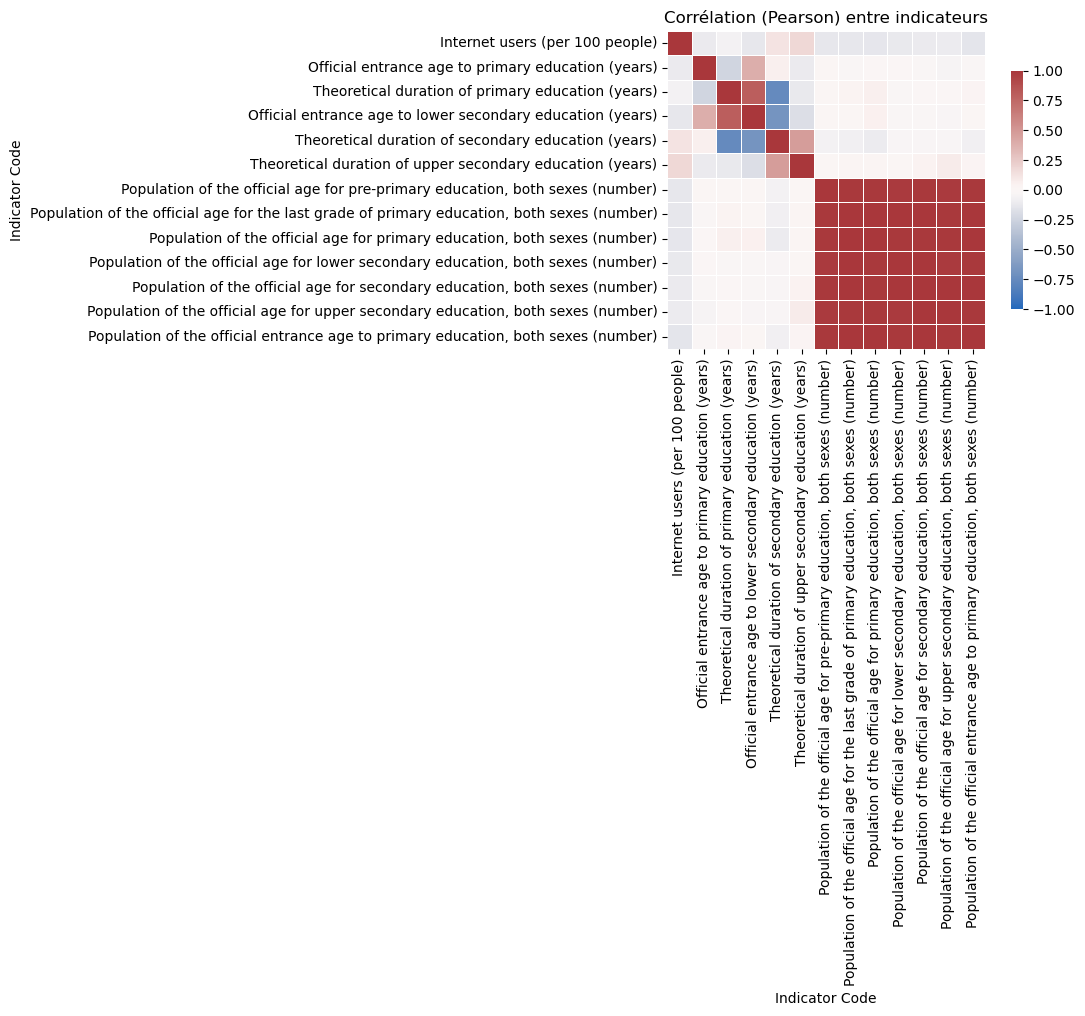


Heatmap - Spearman


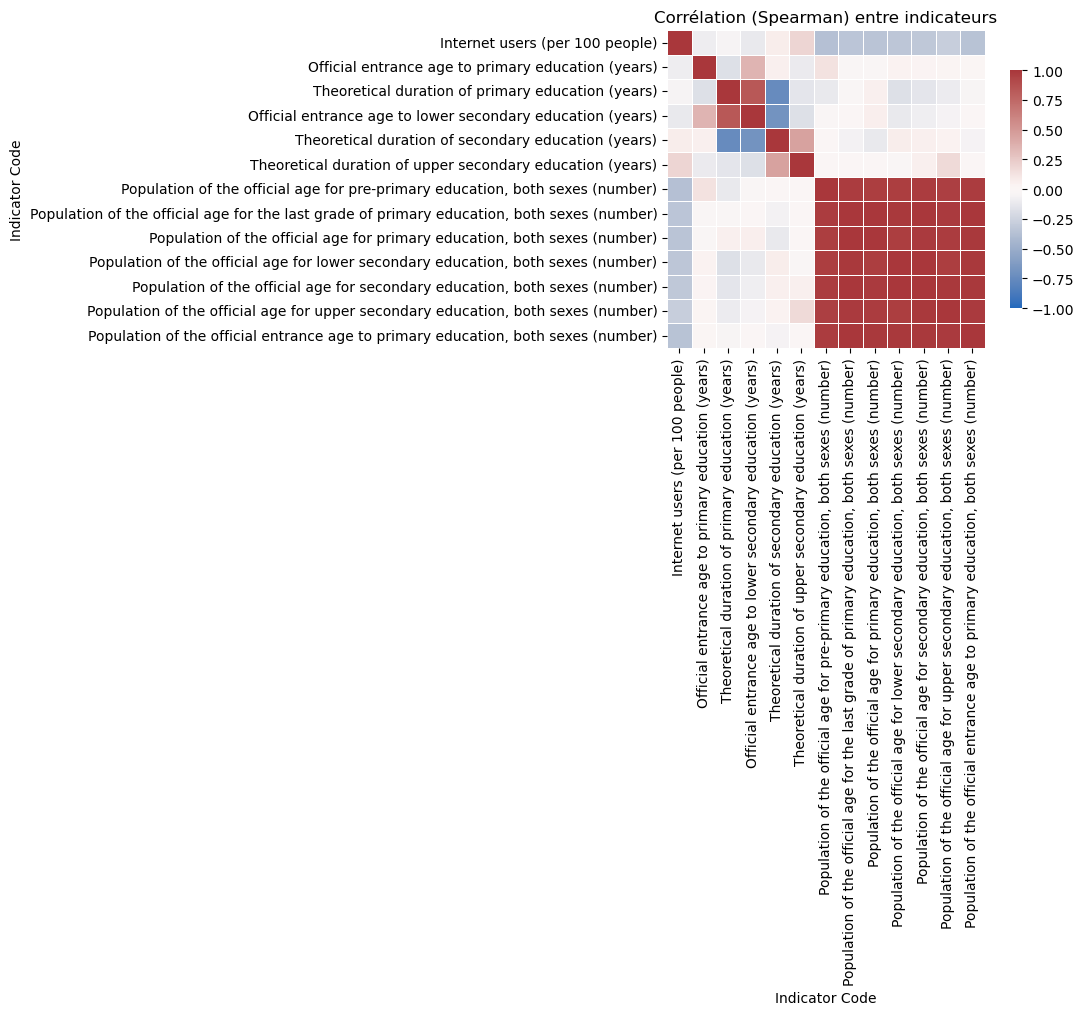


Seuil de corrélation pour suppression : 0.9
Nombre d'indicateurs à supprimer (corrélation > seuil) : 6
Exemples d'indicateurs supprimés : ['Population of the official age for the last grade of primary education, both sexes (number)', 'Population of the official age for primary education, both sexes (number)', 'Population of the official age for lower secondary education, both sexes (number)', 'Population of the official age for secondary education, both sexes (number)', 'Population of the official age for upper secondary education, both sexes (number)', 'Population of the official entrance age to primary education, both sexes (number)']

Dimensions avant suppression : (116, 15)
Dimensions après suppression : (116, 9)
Le DataFrame réduit est sauvegardé sous dfs['consolidated_reduced'].


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df_cons = dfs.get('consolidated')
if df_cons is None:
    raise ValueError("dfs['consolidated'] introuvable. Exécutez l'étape 3 d'abord.")


index_cols = [c for c in ['Country Code','Country Name'] if c in df_cons.columns]
if index_cols:
    df_ind = df_cons.set_index(index_cols)
else:
    df_ind = df_cons.set_index(df_cons.columns[0])


df_num = df_ind.select_dtypes(include=[np.number])
print('Nombre d\'indicateurs numériques analysés :', df_num.shape[1])

if df_num.shape[1] < 2:
    print('Pas assez d\'indicateurs numériques pour calculer des corrélations.')
else:
    corr_pearson = df_num.corr(method='pearson')
    corr_spearman = df_num.corr(method='spearman')


    def plot_heatmap(mat, title, vmax=1.0, vmin=-1.0, figsize=(10,8)):
        plt.figure(figsize=figsize)
        sns.heatmap(mat, cmap='vlag', vmax=vmax, vmin=vmin, center=0,
                    square=True, cbar_kws={"shrink": .75}, linewidths=.5)
        plt.title(title)
        plt.tight_layout()
        plt.show()


    print('\nHeatmap - Pearson')
    plot_heatmap(corr_pearson, 'Corrélation (Pearson) entre indicateurs', figsize=(12,10))

    print('\nHeatmap - Spearman')
    plot_heatmap(corr_spearman, 'Corrélation (Spearman) entre indicateurs', figsize=(12,10))


    CORR_SEUIL = 0.90
    upper = corr_pearson.abs().where(np.triu(np.ones(corr_pearson.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > CORR_SEUIL)]

    print(f"\nSeuil de corrélation pour suppression : {CORR_SEUIL}")
    print(f"Nombre d'indicateurs à supprimer (corrélation > seuil) : {len(to_drop)}")
    if to_drop:
        print('Exemples d\'indicateurs supprimés :', to_drop[:20])


    df_reduced = df_cons.drop(columns=to_drop, errors='ignore')
    print('\nDimensions avant suppression :', df_cons.shape)
    print('Dimensions après suppression :', df_reduced.shape)


    dfs['consolidated_reduced'] = df_reduced
    print("Le DataFrame réduit est sauvegardé sous dfs['consolidated_reduced'].")

## Etape 2 : Analyser vos indicateurs restants et formulez une liste de pays pertinents pour l'implantation d'Académy

Indicateur choisi pour démonstration : Internet users (per 100 people)

Statistiques descriptives :
count    116.000000
mean      46.447355
std       27.957926
min        1.610653
25%       19.984515
50%       47.280236
75%       70.975415
max       94.948943
Name: Internet users (per 100 people), dtype: float64


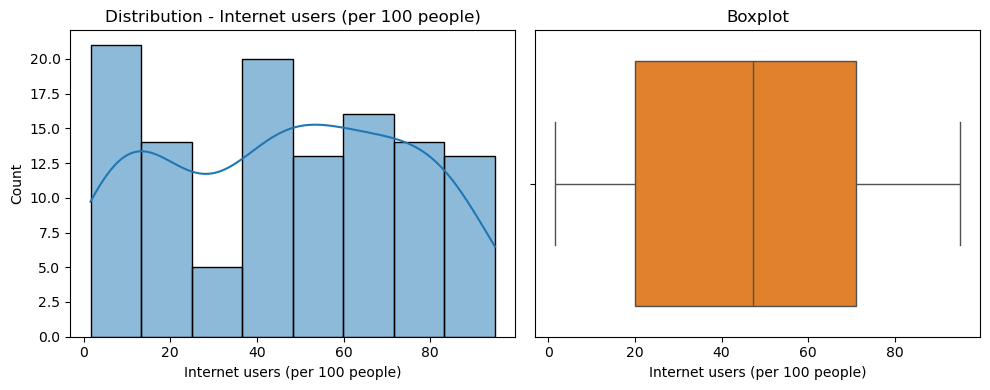


Interprétations (extrait) :
                                                                               n_present  pct_missing          mean           std      skew                                                                                                interpretation
indicator                                                                                                                                                                                                                                                
Internet users (per 100 people)                                                      116          0.0  4.644735e+01  2.795793e+01 -0.052167                                              Distribution proche de symétrique ; Variabilité relative modérée
Official entrance age to primary education (years)                                   116          0.0  6.156609e+00  5.647832e-01 -0.020897                                              Distribution proche de symétrique ; 

In [764]:
if 'consolidated_reduced' in dfs and dfs['consolidated_reduced'] is not None:
    df_cons = dfs['consolidated_reduced']
else:
    df_cons = dfs.get('consolidated')

if df_cons is None:
    raise ValueError("dfs['consolidated'] ou dfs['consolidated_reduced'] introuvable. Exécutez les étapes précédentes.")


idx_cols = [c for c in ['Country Code','Country Name'] if c in df_cons.columns]
if not idx_cols:
    raise ValueError('Impossible de trouver Country Code/Name dans le tableau consolidé.')


df_num = df_cons.set_index(idx_cols).select_dtypes(include=[np.number])
if df_num.shape[1] == 0:
    raise ValueError('Aucun indicateur numérique trouvé dans le tableau consolidé.')

indic_chosen = df_num.columns[0]
print('Indicateur choisi pour démonstration :', indic_chosen)

print('\nStatistiques descriptives :')
print(df_num[indic_chosen].describe())

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df_num[indic_chosen].dropna(), kde=True)
plt.title(f'Distribution - {indic_chosen}')
plt.subplot(1,2,2)
sns.boxplot(x=df_num[indic_chosen].dropna(), color='C1')
plt.title('Boxplot')
plt.tight_layout()
plt.show()

def analyse_indicateur(series, name=None, plot=False):
    s = series.dropna()
    n_total = len(series)
    n_present = s.shape[0]
    pct_missing = (1 - n_present / n_total) * 100 if n_total>0 else 100

    stats = {
        'n_total': n_total,
        'n_present': n_present,
        'pct_missing': round(pct_missing,2),
        'mean': s.mean() if n_present>0 else np.nan,
        'median': s.median() if n_present>0 else np.nan,
        'std': s.std() if n_present>0 else np.nan,
        'skew': s.skew() if n_present>0 else np.nan,
        'kurtosis': s.kurtosis() if n_present>0 else np.nan,
        'min': s.min() if n_present>0 else np.nan,
        'max': s.max() if n_present>0 else np.nan,
    }

    interp = []
    if stats['pct_missing'] > 50:
        interp.append('Beaucoup de données manquantes (>50%)')
    if pd.isna(stats['skew']):
        interp.append('Pas assez de données pour interpréter')
    else:
        if stats['skew'] > 1:
            interp.append('Distribution fortement asymétrique à droite (longue queue à droite)')
        elif stats['skew'] < -1:
            interp.append('Distribution fortement asymétrique à gauche')
        else:
            interp.append('Distribution proche de symétrique')

    if stats['std'] and stats['mean'] and stats['mean']!=0:
        rel_var = stats['std'] / abs(stats['mean'])
        if rel_var > 1:
            interp.append('Grande variabilité relative entre pays')
        else:
            interp.append('Variabilité relative modérée')

    if plot and n_present>0:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.histplot(s, kde=True)
        plt.title(f'Distribution - {name or "indicateur"}')
        plt.subplot(1,2,2)
        sns.boxplot(x=s, color='C1')
        plt.title('Boxplot')
        plt.tight_layout()
        plt.show()

    return stats, ' ; '.join(interp)

res_list = []
for col in df_num.columns:
    stats, interpr = analyse_indicateur(df_num[col], name=col, plot=False)
    stats['indicator'] = col
    stats['interpretation'] = interpr
    res_list.append(stats)

df_interpret = pd.DataFrame(res_list).set_index('indicator')
print('\nInterprétations (extrait) :')
print(df_interpret[['n_present','pct_missing','mean','std','skew','interpretation']].head(10).to_string())

dfs['indicator_summary'] = df_interpret

z = df_num.apply(lambda x: (x - x.mean()) / x.std(), axis=0)

score_pays = z.mean(axis=1)
score_pays.name = 'score'
score_df = score_pays.reset_index()


if 'Country Name' not in score_df.columns:
    for c in score_df.columns:
        if 'country' in str(c).lower() and c != 'score':
            score_df = score_df.rename(columns={c: 'Country Name'})
            break


top10 = score_df.sort_values('score', ascending=False).head(10)
print('\nTop 10 pays selon la méthode moyenne z-score :')
print(top10[['Country Name','score']].to_string(index=False))


dfs['country_scores'] = score_df